<a href="https://colab.research.google.com/github/cam2149/MachinelearningI/blob/main/Examen3_Ejercicio4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maestría en Inteligencia Artificial Aplicada

## Aprendizaje Automatico 1

## Examen 3

### Integrantes

- Andres Felipe Borrero
- Yesid Castelblanco
- Nicolas Colmenares
- Carlos Alberto Martinez

### **Profesores**

- Santiago Ortiz
- Henry Velasco

**Notas:**
-	Todas las respuestas, gráficas, tablas y operaciones deben ser debidamente justificadas.
-	La información que sea obtenida de alguna fuente debe ser citada y referenciada en el documento a entregar.


In [149]:
# Importar librería pandas y numpy
# Pandas es una librería de Python que proporciona estructuras de datos y herramientas de análisis de datos de alto rendimiento
import pandas as pd
# NumPy es una librería de Python que proporciona estructuras de datos y operaciones matemáticas de alto rendimiento.
import numpy as np
#Matplotlib.pyplot es una librería de Python que proporciona herramientas de visualización y gráficos de alta calidad.
import matplotlib.pyplot as plt
from IPython.display import Math, Latex
from IPython.core.display import Image
#Seaborn es una librería de Python que proporciona herramientas de visualización y análisis de datos de alta calidad.
import seaborn as sns

#métricas
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from tqdm.auto import tqdm
import time

#Modelos

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

#sns.set(color_codes=True) es un método de la librería Seaborn que establece los códigos de color predeterminados para los gráficos y diagramas. Cuando se establece color_codes=True, Seaborn utiliza una paleta de colores predefinida y asigna un código de color a cada categoría o variable en los gráficos y diagramas.
sns.set(color_codes=True)
#Cuando se establece rc={'figure.figsize':(10,6)}, Seaborn crea figuras con un tamaño de 10 unidades de ancho y 6 unidades de alto.
sns.set(rc={'figure.figsize':(10,6)})
import warnings
warnings.filterwarnings('ignore')

# Ejercicio 4

4)	El fichero de datos *“Dengue_Data.xlsx”* contiene información epidemiológica de los casos de Dengue en el Departamento de Antioquia. Estos datos contienen tanto información socio-económica como clínica de las personas que resultaron infectadas y desarrollaron Dengue o Dengue Hemorrágico. Para una completa descripción de los datos y/o fenómeno estudiado, remítase al siguiente artículo *Identification of Hazard and Socio-Demographic Patterns of Dengue Infections in a Colombian Subtropical Region from 2015 to 2020: Cox Regression Models and Statistical Analysis.

*Realizar.

* Utilizando solo las variables socio-demográficas, ajuste un modelo Logit y los modelos Logit-Ridge, Logit-LASSO y Logit-Enet (con sus parámetros óptimos, por supuesto) para predecir si una persona va a desarrollar “DENGUE” o “DENGUE GRAVE”. Interprete los resultados de cada modelo y compárelos; defina que variables son las más importantes par predecir el estado categórico modelado, muestre los gráficos de penalidad y de evolución de coeficientes. * Concluya sobre el fenómeno estudiado y a información del artículo.
* Realice el mismo ejercicio anterior, solo que ahora considere como variables explicativas las variables de tipo clínico/médico para modelar si una persona requiere o no ser hospitali- zada. Realice los mismos análisis y procedimientos. Concluya en función de la información presentada en el artículo.


In [150]:
url = 'https://github.com/cam2149/MachinelearningI/raw/19a9b08e636dd80915a4727c674a04c64a962b59/Dengue_Data.xlsx'
dfDengue = pd.read_excel(url, sheet_name='datos_2')

In [151]:
newHeaders = 'Edad', 'GrupoEdad', 'Genero', 'Area', 'Area1', 'Area2','Ocupacion', 'Etnia', 'Discapacidad', 'Desplazados', 'Inmigrantes',      'Prisionero', 'Embarazada', 'Indigena', 'Pobreza', 'Gestante','Desmovilizado', 'VictimaViolencia', 'Otros', 'FechaConsulta', 'InicioSintomas','TipoConsulta', 'Hospitalizado', 'FechaHospitalizacion','TiempodeDeterioro', 'Fiebre', 'DolorCabeza', 'DolorRetroOrbitario',               'DolorMuscular', 'DolorArticular', 'ErupcionCutanea', 'DolorAbdominal', 'Vomitos', 'Diarrea','Somnolencia', 'Hipotension', 'Hepatomegalia', 'HemMucosa', 'Hipotermia','CaidaPlaquetas', 'AcumulacionLiquido', 'AumentoHematocritos', 'Extravasacion', 'Hemorroides','Choque', 'DanioOrgano', 'NombreEvento', 'Region'

dfDengue.columns = newHeaders


In [152]:
dfDengue.describe()

,Edad,FechaConsulta,InicioSintomas,TipoConsulta,FechaHospitalizacion,TiempodeDeterioro
count,50397.000000,50386,50384,50384.000000,14960,14959.000000
mean,29.609858,2017-01-25 06:06:35.252649728,2017-01-20 20:32:11.470307840,4.410349,2017-03-31 07:13:03.529411584,5.136841
min,1.000000,2015-01-04 00:00:00,2014-12-30 00:00:00,0.000000,2015-01-04 00:00:00,0.000000
25%,14.000000,2016-04-05 00:00:00,2016-04-01 00:00:00,2.000000,2016-03-23 00:00:00,3.000000
50%,26.000000,2016-08-01 00:00:00,2016-07-27 00:00:00,4.000000,2016-08-09 00:00:00,4.000000
75%,42.000000,2017-07-19 00:00:00,2017-07-15 00:00:00,5.000000,2018-08-06 00:00:00,6.000000
max,131.000000,2021-02-09 00:00:00,2021-01-02 00:00:00,374.000000,2021-01-11 00:00:00,373.000000
std,19.029978,NaN,NaN,9.448480,NaN,11.527729


In [153]:
dfDengue.head()

,Edad,GrupoEdad,Genero,Area,Area1,Area2,Ocupacion,Etnia,Discapacidad,Desplazados,...,Hipotermia,CaidaPlaquetas,AcumulacionLiquido,AumentoHematocritos,Extravasacion,Hemorroides,Choque,DanioOrgano,NombreEvento,Region
0,4,Primera infancia,M,Rural Disperso,Rural Disperso,Rural Disperso,Ocupaciones elementales,"Negro, Mulato, Afrocolombiano",No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,DENGUE,URABA
1,27,Adultez,M,Cabecera Municipal,Cabecera Municipal,Cabecera Municipal,Ocupaciones elementales,Otro,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,DENGUE,VALLE DE ABURRA
2,46,Adultez,F,Cabecera Municipal,Cabecera Municipal,Cabecera Municipal,Trabajadores de los servicios y vendedores de ...,Otro,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,DENGUE,VALLE DE ABURRA
3,35,Adultez,M,Cabecera Municipal,Cabecera Municipal,Cabecera Municipal,Ocupaciones elementales,Otro,No,No,...,No,No,No,No,NaN,NaN,No,NaN,DENGUE,VALLE DE ABURRA
4,11,Infancia,M,Rural Disperso,Rural Disperso,Rural Disperso,Ocupaciones elementales,"Negro, Mulato, Afrocolombiano",No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,DENGUE,URABA


In [154]:

dfDengue.tail()

,Edad,GrupoEdad,Genero,Area,Area1,Area2,Ocupacion,Etnia,Discapacidad,Desplazados,...,Hipotermia,CaidaPlaquetas,AcumulacionLiquido,AumentoHematocritos,Extravasacion,Hemorroides,Choque,DanioOrgano,NombreEvento,Region
50392,6,Infancia,F,1,Cabecera Municipal,Cabecera Municipal,Ocupaciones elementales,Otro,No,No,...,No,Sí,Sí,No,Sí,No,No,No,DENGUE GRAVE,VALLE DE ABURRA
50393,9,Infancia,F,3,Rural Disperso,Rural Disperso,Ocupaciones elementales,"Negro, Mulato, Afrocolombiano",No,No,...,No,Sí,No,No,Sí,No,No,No,DENGUE GRAVE,URABA
50394,17,Adolescencia,F,3,Rural Disperso,Rural Disperso,Ocupaciones elementales,Otro,No,No,...,No,Sí,No,Sí,No,Sí,No,No,DENGUE GRAVE,URABA
50395,24,Juventud,F,1,Cabecera Municipal,Cabecera Municipal,Ocupaciones elementales,Otro,No,No,...,No,Sí,Sí,No,Sí,No,Sí,Sí,DENGUE GRAVE,BAJO CAUCA
50396,43,Adultez,F,1,Cabecera Municipal,Cabecera Municipal,Ocupaciones elementales,Otro,No,No,...,No,No,No,No,No,No,No,Sí,DENGUE GRAVE,NORDESTE


In [155]:
dfDengue.isna().sum()

,0
Edad,0
GrupoEdad,0
Genero,0
Area,0
Area1,0
Area2,0
Ocupacion,0
Etnia,0
Discapacidad,736
Desplazados,721


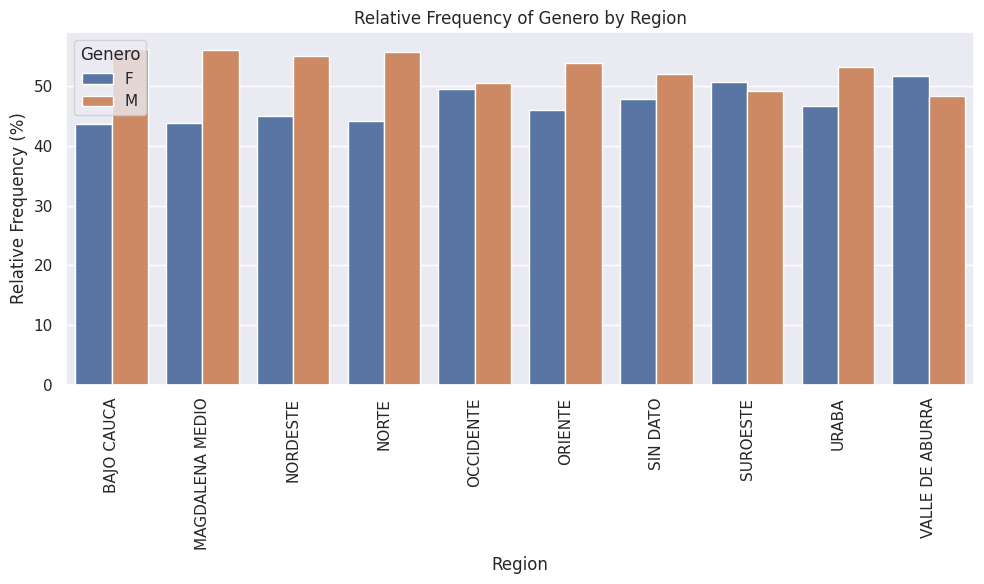

In [156]:
genero_freq_by_region = dfDengue.groupby(['Region', 'Genero'])['Genero'].count() / dfDengue.groupby('Region')['Genero'].count() * 100
genero_freq_by_region = genero_freq_by_region.reset_index(name='Relative Frequency')
sns.barplot(x='Region', y='Relative Frequency', hue='Genero', data=genero_freq_by_region)
plt.title('Relative Frequency of Genero by Region')
plt.xlabel('Region')
plt.ylabel('Relative Frequency (%)')
plt.xticks(rotation=90)
plt.legend(title='Genero')
plt.tight_layout()
plt.show()

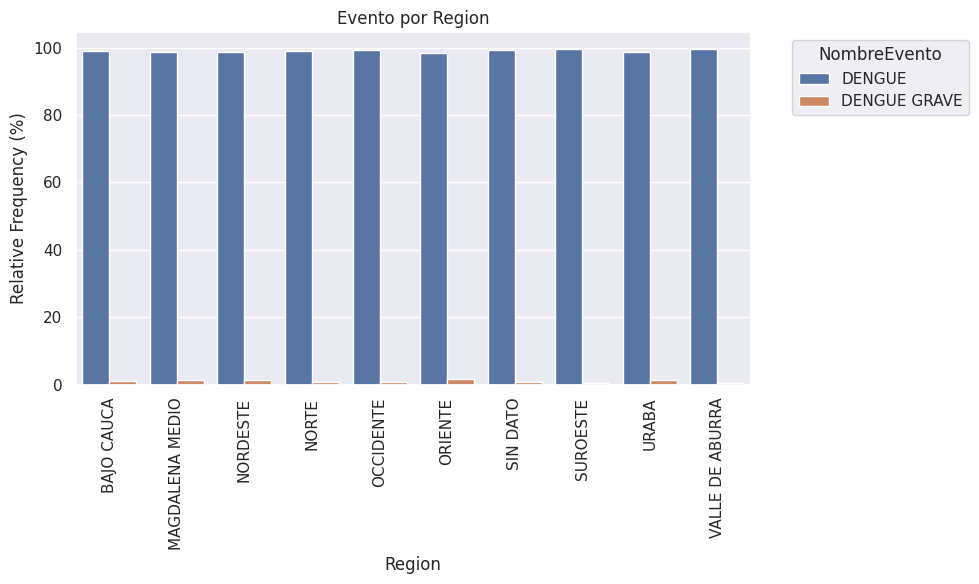

In [157]:
nombre_evento_freq_by_region = dfDengue.groupby(['Region', 'NombreEvento'])['NombreEvento'].count() / dfDengue.groupby('Region')['NombreEvento'].count() * 100
nombre_evento_freq_by_region = nombre_evento_freq_by_region.reset_index(name='Relative Frequency')
sns.barplot(x='Region', y='Relative Frequency', hue='NombreEvento', data=nombre_evento_freq_by_region)
plt.title('Evento por Region')
plt.xlabel('Region')
plt.ylabel('Relative Frequency (%)')
plt.xticks(rotation=90)
plt.legend(title='NombreEvento', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [158]:
dfDengue.Genero.replace({"M":1,"F":0},inplace=True)

In [159]:
# Recorrer todos los campos y si su valor es NaN convertir en un 0, si el en valor es No en 0 o si el valor es Si en 1
for column in dfDengue.columns:
  # Reemplazar valoes NaN con 0
  dfDengue[column].fillna(0, inplace=True)
  # Reemplazar "No" con 0 y "Si" con 1
  dfDengue[column] = dfDengue[column].replace({"No": 0, "Si": 1})
  dfDengue[column] = dfDengue[column].replace({"No": 0, "Sí": 1})
  # Reemplazar "DENGUE" con 1 and "DENGUE GRAVE" con 2
  dfDengue[column] = dfDengue[column].replace({"DENGUE": 1, "DENGUE GRAVE": 2})

In [160]:
dfDengue.isna().sum()

,0
Edad,0
GrupoEdad,0
Genero,0
Area,0
Area1,0
Area2,0
Ocupacion,0
Etnia,0
Discapacidad,0
Desplazados,0


In [161]:
dfDengue.head()

,Edad,GrupoEdad,Genero,Area,Area1,Area2,Ocupacion,Etnia,Discapacidad,Desplazados,...,Hipotermia,CaidaPlaquetas,AcumulacionLiquido,AumentoHematocritos,Extravasacion,Hemorroides,Choque,DanioOrgano,NombreEvento,Region
0,4,Primera infancia,1,Rural Disperso,Rural Disperso,Rural Disperso,Ocupaciones elementales,"Negro, Mulato, Afrocolombiano",0,0,...,0,0,0,0,0,0,0,0,1,URABA
1,27,Adultez,1,Cabecera Municipal,Cabecera Municipal,Cabecera Municipal,Ocupaciones elementales,Otro,0,0,...,0,0,0,0,0,0,0,0,1,VALLE DE ABURRA
2,46,Adultez,0,Cabecera Municipal,Cabecera Municipal,Cabecera Municipal,Trabajadores de los servicios y vendedores de ...,Otro,0,0,...,0,0,0,0,0,0,0,0,1,VALLE DE ABURRA
3,35,Adultez,1,Cabecera Municipal,Cabecera Municipal,Cabecera Municipal,Ocupaciones elementales,Otro,0,0,...,0,0,0,0,0,0,0,0,1,VALLE DE ABURRA
4,11,Infancia,1,Rural Disperso,Rural Disperso,Rural Disperso,Ocupaciones elementales,"Negro, Mulato, Afrocolombiano",0,0,...,0,0,0,0,0,0,0,0,1,URABA


In [162]:
unique_nombre_evento_counts = dfDengue['NombreEvento'].value_counts()
unique_nombre_evento_counts

,count
NombreEvento,
1,50101
2,296


In [163]:
dfDengue.tail()

,Edad,GrupoEdad,Genero,Area,Area1,Area2,Ocupacion,Etnia,Discapacidad,Desplazados,...,Hipotermia,CaidaPlaquetas,AcumulacionLiquido,AumentoHematocritos,Extravasacion,Hemorroides,Choque,DanioOrgano,NombreEvento,Region
50392,6,Infancia,0,1,Cabecera Municipal,Cabecera Municipal,Ocupaciones elementales,Otro,0,0,...,0,1,1,0,1,0,0,0,2,VALLE DE ABURRA
50393,9,Infancia,0,3,Rural Disperso,Rural Disperso,Ocupaciones elementales,"Negro, Mulato, Afrocolombiano",0,0,...,0,1,0,0,1,0,0,0,2,URABA
50394,17,Adolescencia,0,3,Rural Disperso,Rural Disperso,Ocupaciones elementales,Otro,0,0,...,0,1,0,1,0,1,0,0,2,URABA
50395,24,Juventud,0,1,Cabecera Municipal,Cabecera Municipal,Ocupaciones elementales,Otro,0,0,...,0,1,1,0,1,0,1,1,2,BAJO CAUCA
50396,43,Adultez,0,1,Cabecera Municipal,Cabecera Municipal,Ocupaciones elementales,Otro,0,0,...,0,0,0,0,0,0,0,1,2,NORDESTE


In [164]:
# Filtrar las variables socio-demográficas
socio_demo_vars = ['Edad', 'GrupoEdad', 'Genero', 'Area', 'Area1', 'Area2','Ocupacion', 'Etnia', 'Discapacidad', 'Desplazados', 'Inmigrantes', 'Prisionero', 'Embarazada', 'Indigena', 'Pobreza', 'Gestante','Desmovilizado', 'VictimaViolencia', 'Otros', 'Region', 'NombreEvento']
df_socio_demo = dfDengue[socio_demo_vars].copy()

# Convertir variables categóricas a numéricas usando one-hot encoding
df_socio_demo = pd.get_dummies(df_socio_demo,
                               columns=['GrupoEdad', 'Area', 'Area1', 'Area2','Ocupacion', 'Etnia','Region'],
                               drop_first=True)

# Definir variables predictoras (X) y variable objetivo (y)
X = df_socio_demo.drop('NombreEvento', axis=1)
y = (df_socio_demo['NombreEvento'] == 2).astype(int)

# Escalar las variables predictoras
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [165]:

# Dividir los datos en conjuntos de entrenamiento y prueba (opcional, para evaluar el modelo)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Ajustar modelo Logit
logit_model = LogisticRegression()
logit_model.fit(X_train, y_train)


LogisticRegression()

In [166]:
logit_model.score(X_train, y_train)

0.994245603591537

In [167]:

# Ajustar modelo Logit-Ridge
param_grid_ridge = {'C': np.logspace(-4, 4, 20), 'penalty': ['l2']}
ridge_model = GridSearchCV(LogisticRegression(), param_grid_ridge, cv=5)
ridge_model.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'penalty': ['l2']})

In [168]:
ridge_model.score(X_train, y_train)

0.994245603591537

In [169]:

# Ajustar modelo Logit-LASSO
param_grid_lasso = {'C': np.logspace(-4, 4, 20), 'penalty': ['l1'], 'solver': ['liblinear']}
lasso_model = GridSearchCV(LogisticRegression(), param_grid_lasso, cv=5)
lasso_model.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'penalty': ['l1'], 'solver': ['liblinear']})

In [170]:
lasso_model.score(X_train, y_train)

0.994245603591537

In [171]:

# Ajustar modelo Logit-Enet
param_grid_enet = {'C': np.logspace(-4, 4, 20), 'penalty': ['elasticnet'], 'l1_ratio': np.linspace(0, 1, 10), 'solver': ['saga']}
enet_model = GridSearchCV(LogisticRegression(), param_grid_enet, cv=5)
enet_model.fit(X_scaled, y)


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'l1_ratio': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                         'penalty': ['elasticnet'], 'solver': ['saga']})

In [172]:
enet_model.score(X_train, y_train)

0.994245603591537

In [173]:

# Interpretar resultados, comparar modelos, identificar variables importantes,
# graficar penalidad y evolución de coeficientes

# ... (Agregar código para interpretar los resultados de cada modelo)

# Conclusión sobre el fenómeno estudiado y la información del artículo
# ... (Escribir una conclusión basada en los resultados de los modelos y la información del artículo)